<a href="https://colab.research.google.com/github/saurabhkr52/United-Airlines-Customer-Analysis/blob/main/unitedAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-> Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors contributing to extended call durations, such as agent performance, call types, and sentiment. Identify key drivers of long AHT and AST, especially during high volume call periods. Additionally, could you quantify the percentage difference between the average handling time for the most frequent and least frequent call reasons?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/merged_file.csv')

<ipython-input-5-7ccd7c262c4c>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/merged_file.csv')


In [16]:
# Convert datetime columns to actual datetime format for calculation
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'], errors='coerce')
data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'], errors='coerce')

# Calculate Handle Time (in minutes) for each call
data['handle_time'] = (data['call_end_datetime'] - data['call_start_datetime']).dt.total_seconds() / 60

# Group by 'primary_call_reason' to calculate average handle time and call frequency
call_reason_stats = data.groupby('primary_call_reason').agg(
    average_handle_time=('handle_time', 'mean'),
    frequency=('primary_call_reason', 'size')
).sort_values(by='frequency', ascending=False)

# Identify the most and least frequent call reasons and calculate percentage difference in AHT
most_frequent = call_reason_stats.iloc[0]
least_frequent = call_reason_stats.iloc[-1]

# Calculate the percentage difference in average handle time between the most and least frequent call reasons
aht_percentage_difference = ((most_frequent['average_handle_time'] - least_frequent['average_handle_time']) / least_frequent['average_handle_time']) * 100

call_reason_stats, aht_percentage_difference


(                                                    average_handle_time  \
 primary_call_reason                                                       
  today?                                                       18.915626   
 Digital  Support                                              13.000000   
 IRROPS                                                        13.000000   
 Voluntary Change                                              13.000000   
 Seating                                                       13.000000   
 y chance there's another more affordable option...            18.933929   
 Mileage Plus                                                  13.000000   
 ETC                                                           17.691058   
 Post-Flight                                                   13.000000   
 Communications                                                13.000000   
 Products and Services                                         13.000000   
 Upgrade    

->  To visualize the agent sentiment data, we can create a bar plot to show the distribution of sentiment ratings across calls. If average_sentiment is a numeric score, we could use a histogram or box plot to visualize the range and distribution of sentiment values. Here’s sample code using seaborn and matplotlib.

<ipython-input-17-192e56ace9e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-17-192e56ace9e5>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-17-192e56ace9e5>:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


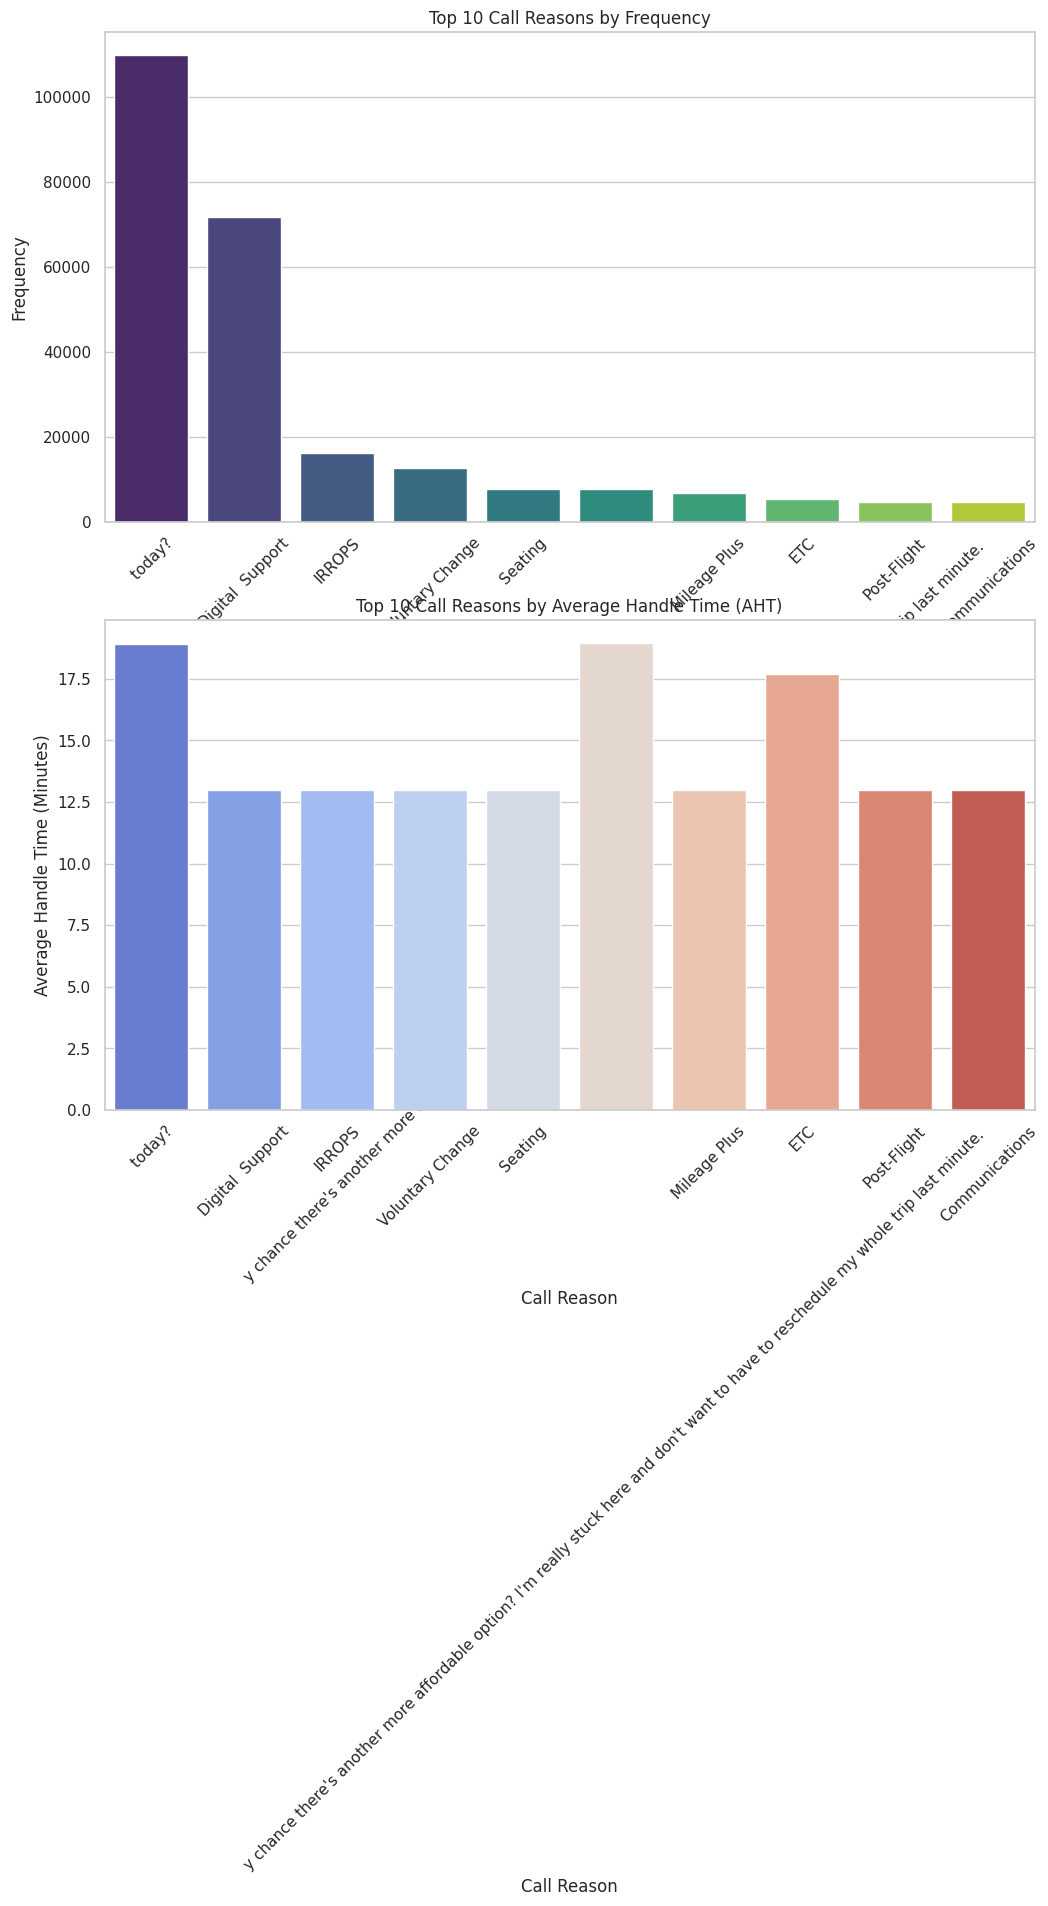

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Sort the data by frequency for better visualization
sorted_call_reason_stats = call_reason_stats.sort_values(by='frequency', ascending=False).head(10)

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Plot 1: Frequency of Top 10 Call Reasons
sns.barplot(
    x=sorted_call_reason_stats.index,
    y=sorted_call_reason_stats['frequency'],
    palette='viridis',
    ax=ax[0]
)
ax[0].set_title('Top 10 Call Reasons by Frequency')
ax[0].set_xlabel('Call Reason')
ax[0].set_ylabel('Frequency')
ax[0].tick_params(axis='x', rotation=45)

# Plot 2: Average Handle Time (AHT) of Top 10 Call Reasons
sns.barplot(
    x=sorted_call_reason_stats.index,
    y=sorted_call_reason_stats['average_handle_time'],
    palette='coolwarm',
    ax=ax[1]
)
ax[1].set_title('Top 10 Call Reasons by Average Handle Time (AHT)')
ax[1].set_xlabel('Call Reason')
ax[1].set_ylabel('Average Handle Time (Minutes)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-18-c76571574563>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agent_sentiment_counts.index, y=agent_sentiment_counts.values, palette='viridis')


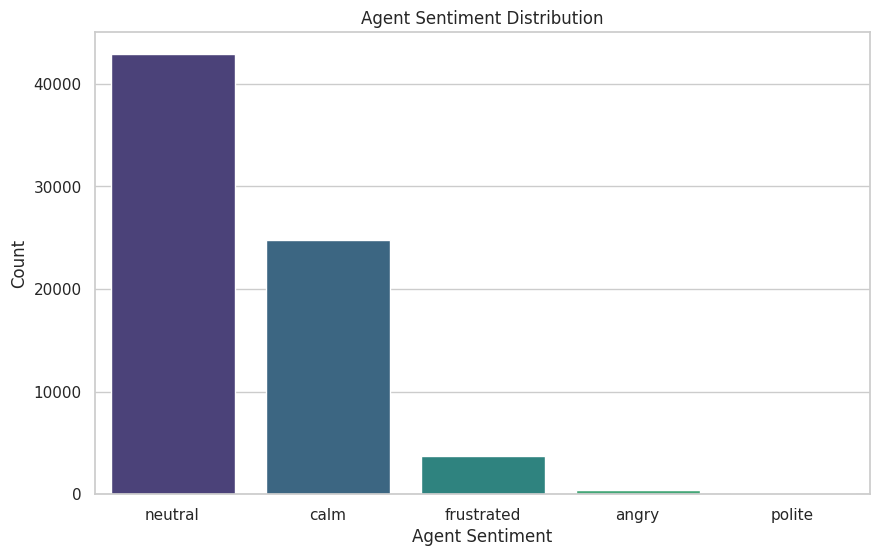

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

# Convert sentiment data to categorical if it's not numeric (replace 'Positive', 'Neutral', 'Negative' with actual labels if needed)
if data['agent_tone'].dtype == 'object':
    agent_sentiment_counts = data['agent_tone'].value_counts()

    # Bar Plot for Categorical Agent Sentiment
    plt.figure(figsize=(10, 6))
    sns.barplot(x=agent_sentiment_counts.index, y=agent_sentiment_counts.values, palette='viridis')
    plt.title('Agent Sentiment Distribution')
    plt.xlabel('Agent Sentiment')
    plt.ylabel('Count')
    plt.show()

else:
    # If sentiment is numeric, using histogram and boxplot for distribution
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data['agent_tone'], kde=True, bins=20, color="skyblue")
    plt.title('Agent Sentiment Score Distribution')
    plt.xlabel('Sentiment Score')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data['agent_tone'], color="salmon")
    plt.title('Agent Sentiment Score Spread')
    plt.xlabel('Sentiment Score')

    plt.tight_layout()
    plt.show()


In [22]:
import pandas as pd

# Quick check of the data structure
print(data.head())
print(data.info())


      call_id   customer_id  agent_id call_start_datetime  \
0  4667960400  2033123310.0  963118.0 2024-07-31 23:56:00   
1  1122072124  8186702651.0  519057.0 2024-08-01 00:03:00   
2  6834291559  2416856629.0  158319.0 2024-07-31 23:59:00   
3  2266439882  1154544516.0  488324.0 2024-08-01 00:05:00   
4  1211603231  5214456437.0  721730.0 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0           8/1/2024 0:03 2024-08-01 00:34:00   
1           8/1/2024 0:06 2024-08-01 00:18:00   
2           8/1/2024 0:07 2024-08-01 00:26:00   
3           8/1/2024 0:10 2024-08-01 00:17:00   
4           8/1/2024 0:14 2024-08-01 00:23:00   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...                 NaN   
1  \n\nAgent: Thank you for calling United Airlin...                 NaN   
2  \n\nAgent: Thank you for calling United Airlin...                 NaN   
3  \n\nAgent: Thank you for callin

Second question: Analysis of reasons for calling the agents of united airlines.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset


# Step 1: Explore the dataset
print("Dataset Overview:")
print(data.head())
print("\nColumn Data Types:")
print(data.info())

# Step 2: Handle missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Impute or drop missing values (example: forward-fill)
data.fillna(method='ffill', inplace=True)

# Step 3: Encode categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Step 4: Feature scaling
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 5: Define features (X) and target (y)
X = data.drop('call_reason', axis=1)  # Replace 'call_reason' with the actual target column
y = data['call_reason']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nFeature Importances:")
for i in range(len(importances)):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Save the model (optional)
import joblib
joblib.dump(model, 'call_reason_classifier.pkl')

print("Model training and evaluation complete.")


Dataset Overview:
      call_id   customer_id  agent_id call_start_datetime  \
0  4667960400  2033123310.0  963118.0 2024-07-31 23:56:00   
1  1122072124  8186702651.0  519057.0 2024-08-01 00:03:00   
2  6834291559  2416856629.0  158319.0 2024-07-31 23:59:00   
3  2266439882  1154544516.0  488324.0 2024-08-01 00:05:00   
4  1211603231  5214456437.0  721730.0 2024-08-01 00:04:00   

  agent_assigned_datetime   call_end_datetime  \
0           8/1/2024 0:03 2024-08-01 00:34:00   
1           8/1/2024 0:06 2024-08-01 00:18:00   
2           8/1/2024 0:07 2024-08-01 00:26:00   
3           8/1/2024 0:10 2024-08-01 00:17:00   
4           8/1/2024 0:14 2024-08-01 00:23:00   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...                 NaN   
1  \n\nAgent: Thank you for calling United Airlin...                 NaN   
2  \n\nAgent: Thank you for calling United Airlin...                 NaN   
3  \n\nAgent: Th

<ipython-input-10-34a3911ea19e>:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']